<a href="https://colab.research.google.com/github/KethanKumar13/Fruit_Classification/blob/main/Fruit_Classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report

In [ ]:
dataset_url = "/content/drive/MyDrive/Colab Notebooks/fruits-360-original-size/fruits-360-original-size/Training"

img_height= 100
img_width = 100
batch_size = 32

Split training set 80/20 into training and validation set.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_url,
    validation_split=0.2,
    subset= 'training',
    seed = 123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 6231 files belonging to 24 classes.
Using 4985 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_url,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height,img_width),
  batch_size=batch_size
)


Found 6231 files belonging to 24 classes.
Using 1246 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)


['apple_6', 'apple_braeburn_1', 'apple_crimson_snow_1', 'apple_golden_1', 'apple_golden_2', 'apple_golden_3', 'apple_granny_smith_1', 'apple_hit_1', 'apple_pink_lady_1', 'apple_red_1', 'apple_red_2', 'apple_red_3', 'apple_red_delicios_1', 'apple_red_yellow_1', 'apple_rotten_1', 'cabbage_white_1', 'carrot_1', 'cucumber_1', 'cucumber_3', 'eggplant_violet_1', 'pear_1', 'pear_3', 'zucchini_1', 'zucchini_dark_1']


So the classes of fruit where some have multiple version of the same type.
Shown below are some examples images.

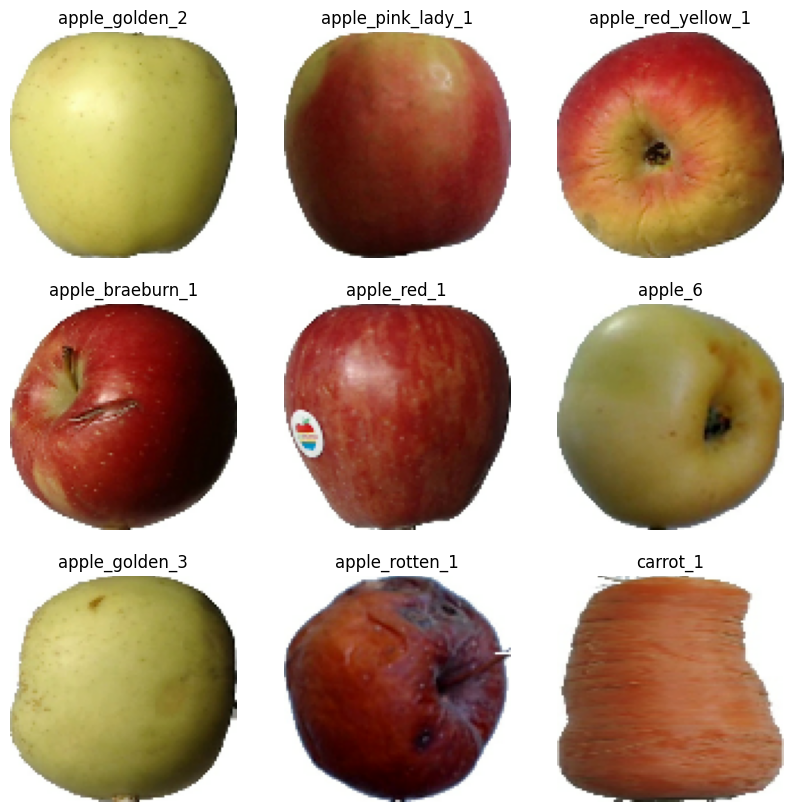

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)


In [ ]:
num_classes = len(class_names)

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #resacle to be between 0 and 1
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                  

## Training the model

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
156/156 [==============================] - 1247s 8s/step - loss: 1.4847 - accuracy: 0.4776 - val_loss: 0.6293 - val_accuracy: 0.7376
Epoch 2/15
156/156 [==============================] - 18s 114ms/step - loss: 0.4915 - accuracy: 0.8349 - val_loss: 0.6037 - val_accuracy: 0.7729
Epoch 3/15
156/156 [==============================] - 18s 109ms/step - loss: 0.2734 - accuracy: 0.9027 - val_loss: 0.1112 - val_accuracy: 0.9559
Epoch 4/15
156/156 [==============================] - 17s 107ms/step - loss: 0.1452 - accuracy: 0.9468 - val_loss: 0.2224 - val_accuracy: 0.9053
Epoch 5/15
156/156 [==============================] - 17s 107ms/step - loss: 0.1451 - accuracy: 0.9478 - val_loss: 0.0911 - val_accuracy: 0.9687
Epoch 6/15
156/156 [==============================] - 17s 108ms/step - loss: 0.1409 - accuracy: 0.9488 - val_loss: 0.1042 - val_accuracy: 0.9615
Epoch 7/15
156/156 [==============================] - 20s 123ms/step - loss: 0.0753 - accuracy: 0.9725 - val_loss: 0.1078 - val_acc

# Training progress

The figure below shows how the training and validation accuracy and loss evolve over the epochs.

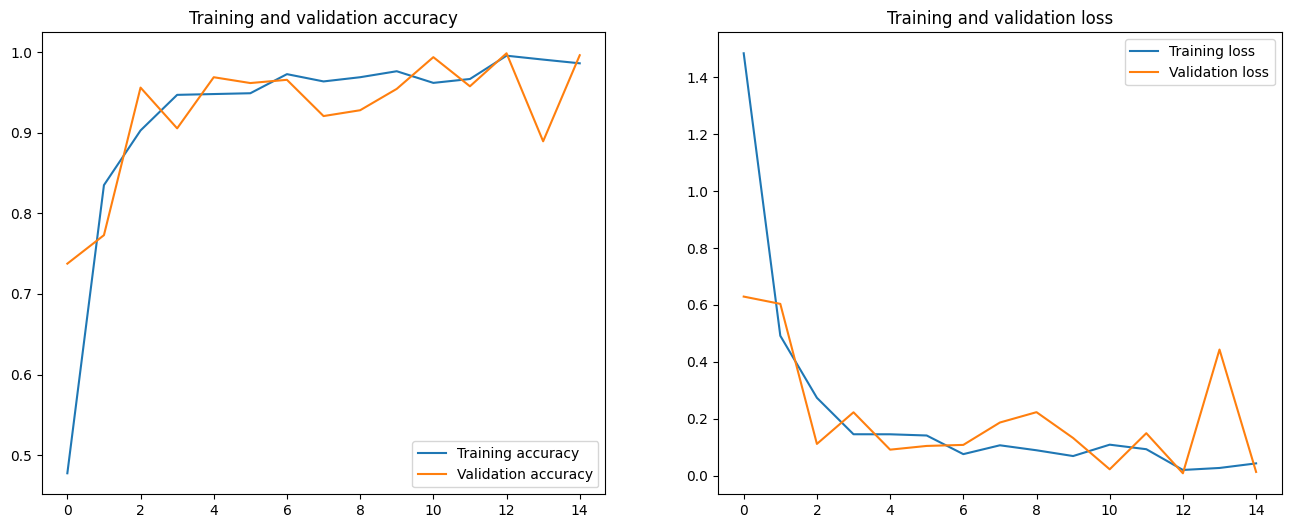

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()


## Testing the model

First let's have a look at how the model does on an image of a apple.

In [ ]:
test_apple_url = "/content/drive/MyDrive/Colab Notebooks/fruits-360-original-size/fruits-360-original-size/Test/apple_6/r0_107.jpg"
img = tf.keras.utils.load_img(test_apple_url, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # create a batch

predictions = model.predict(img_array)
score_apple = tf.nn.softmax(predictions[0])
print(
    "This image most likely is a {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_apple)], 100 * np.max(score_apple))
)

1/1 [==============================] - 0s 33ms/step
This image most likely is a apple_6 with a 100.00 percent confidence.


In [ ]:
test_url = "/content/drive/MyDrive/Colab Notebooks/fruits-360-original-size/fruits-360-original-size/Test"

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_url,
    seed = 123,
    image_size=(img_height,img_width),
    shuffle=False #No shuffling for classification report
)

Found 3110 files belonging to 24 classes.


In [ ]:
test_images, test_labels = tuple(zip(*test_ds))

predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)

98/98 [==============================] - 10s 99ms/step


calculating the accuracy for each class using a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
test_labels1 = np.concatenate(test_labels)
predicted_labels = np.argmax(score, axis=1)

cm = confusion_matrix(test_labels1, predicted_labels)
class_accuracy = np.diag(cm) / cm.sum(axis=1)

for i, class_name in enumerate(class_names):
    print(f"Accuracy for {class_name}: {class_accuracy[i]}")

Accuracy for apple_6: 1.0
Accuracy for apple_braeburn_1: 1.0
Accuracy for apple_crimson_snow_1: 0.9622641509433962
Accuracy for apple_golden_1: 1.0
Accuracy for apple_golden_2: 1.0
Accuracy for apple_golden_3: 1.0
Accuracy for apple_granny_smith_1: 1.0
Accuracy for apple_hit_1: 1.0
Accuracy for apple_pink_lady_1: 0.967948717948718
Accuracy for apple_red_1: 1.0
Accuracy for apple_red_2: 0.9874213836477987
Accuracy for apple_red_3: 1.0
Accuracy for apple_red_delicios_1: 1.0
Accuracy for apple_red_yellow_1: 1.0
Accuracy for apple_rotten_1: 1.0
Accuracy for cabbage_white_1: 1.0
Accuracy for carrot_1: 1.0
Accuracy for cucumber_1: 1.0
Accuracy for cucumber_3: 1.0
Accuracy for eggplant_violet_1: 1.0
Accuracy for pear_1: 1.0
Accuracy for pear_3: 1.0
Accuracy for zucchini_1: 1.0
Accuracy for zucchini_dark_1: 1.0


In [ ]:
results = model.evaluate(test_ds)
print("Test loss, test acc:", results)

98/98 [==============================] - 9s 92ms/step - loss: 0.0119 - accuracy: 0.9958
Test loss, test acc: [0.011892764829099178, 0.9958199262619019]


Evaluating the performance of the model

In [ ]:
y_test = np.concatenate(test_labels)
y_pred = np.array([np.argmax(s) for s in score])

print(classification_report(y_test, y_pred, target_names=class_names))


                      precision    recall  f1-score   support

             apple_6       1.00      1.00      1.00       157
    apple_braeburn_1       0.95      1.00      0.98       160
apple_crimson_snow_1       1.00      0.96      0.98       159
      apple_golden_1       1.00      1.00      1.00       154
      apple_golden_2       1.00      1.00      1.00       154
      apple_golden_3       1.00      1.00      1.00       158
apple_granny_smith_1       1.00      1.00      1.00       160
         apple_hit_1       1.00      1.00      1.00       234
   apple_pink_lady_1       1.00      0.97      0.98       156
         apple_red_1       1.00      1.00      1.00       154
         apple_red_2       0.99      0.99      0.99       159
         apple_red_3       1.00      1.00      1.00       140
apple_red_delicios_1       1.00      1.00      1.00       150
  apple_red_yellow_1       1.00      1.00      1.00       154
      apple_rotten_1       0.98      1.00      0.99       159
     ca

In [ ]:
#Get a selection of images
image_batch, label_batch = next(iter(train_ds))
prediction_batch = model.predict(image_batch)
score_batch = tf.nn.softmax(prediction_batch)

1/1 [==============================] - 0s 41ms/step


Below are some test images with their actual class an their prediction.

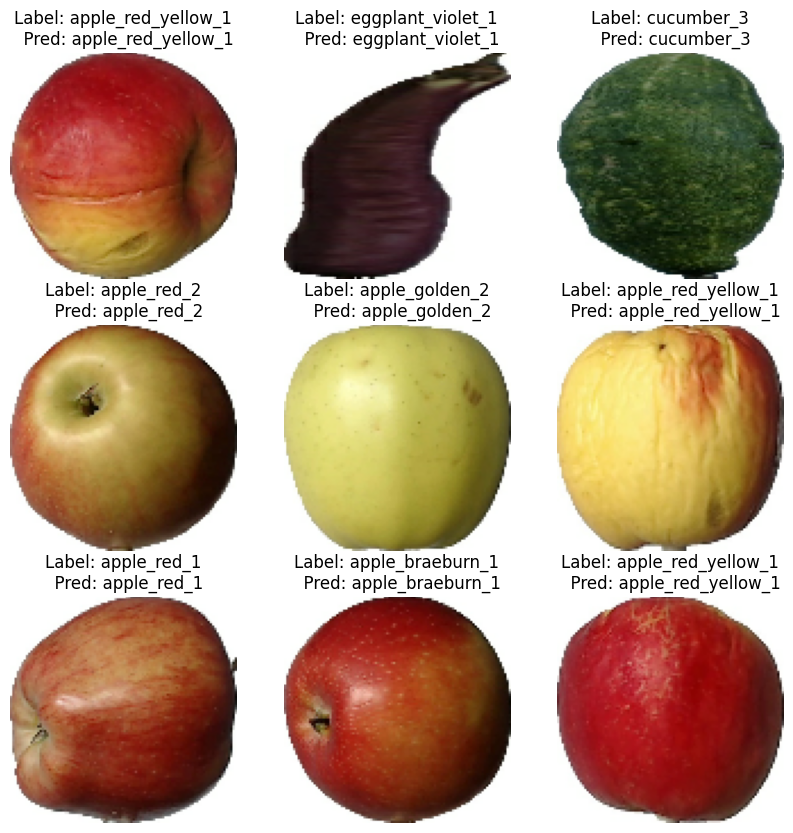

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title( "Label: " + class_names[label] + "\n  Pred: " + class_names[np.argmax(score_batch[i])])
  plt.axis("off")